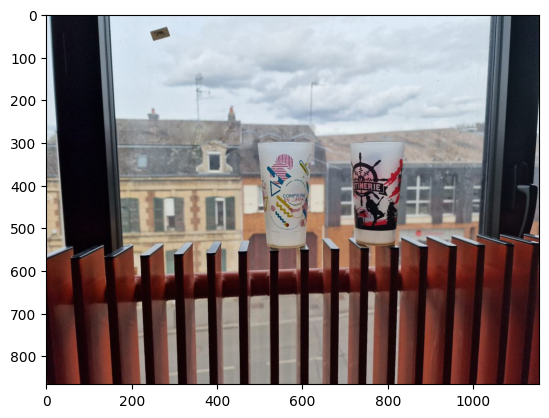

In [3]:
from skimage import io
from matplotlib import pyplot as plt
# load image
img = io.imread('data/images/pos/abigotte_pos_001.jpg')
plt.imshow(img)

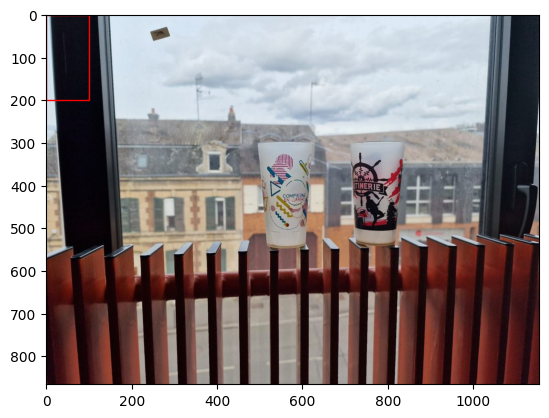

In [7]:
x,y,w,h = 0,0,100,200
plt.imshow(img)
plt.gca().add_patch(plt.Rectangle((x,y),w,h,fill=False,color='r'))

In [10]:
# slide window and cut out patches every 2px
step_size = 2
patches = []
image_patches = []
for y in range(0,img.shape[0],step_size):
    for x in range(0,img.shape[1],step_size):
        image_patches.append(img[y:y+h,x:x+w])
        patches.append((x,y,w,h))

In [21]:
# get annoted boxes from csv file
import pandas as pd

csv = pd.read_csv('data/labels.csv')
labelled_boxes = csv[csv['filename'] == 'abigotte_pos_001']

In [19]:
def IoU(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # calculate intersection area
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1 + w1, x2 + w2)
    y_bottom = min(y1 + h1, y2 + h2)
    if x_right < x_left or y_bottom < y_top:
        intersection_area = 0
    else:
        intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # calculate union area
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - intersection_area

    # calculate IoU
    if union_area == 0:
        iou = 0
    else:
        iou = intersection_area / union_area

    return iou

In [31]:
# check if some patches match the annotated boxes more than 0.5
# if so, add them to the positive set

positive_patches = []
for box in labelled_boxes.values:
    for patch in patches:
        if IoU(patch, box[1:-1]) > 0.3:
            positive_patches.append(patch)

In [32]:
positive_patches

[(298, 414, 100, 200),
 (300, 414, 100, 200),
 (302, 414, 100, 200),
 (304, 414, 100, 200),
 (306, 414, 100, 200),
 (308, 414, 100, 200),
 (310, 414, 100, 200),
 (312, 414, 100, 200),
 (314, 414, 100, 200),
 (316, 414, 100, 200),
 (318, 414, 100, 200),
 (320, 414, 100, 200),
 (322, 414, 100, 200),
 (324, 414, 100, 200),
 (326, 414, 100, 200),
 (328, 414, 100, 200),
 (330, 414, 100, 200),
 (332, 414, 100, 200),
 (334, 414, 100, 200),
 (336, 414, 100, 200),
 (338, 414, 100, 200),
 (340, 414, 100, 200),
 (342, 414, 100, 200),
 (344, 414, 100, 200),
 (346, 414, 100, 200),
 (348, 414, 100, 200),
 (350, 414, 100, 200),
 (352, 414, 100, 200),
 (354, 414, 100, 200),
 (356, 414, 100, 200),
 (358, 414, 100, 200),
 (360, 414, 100, 200),
 (362, 414, 100, 200),
 (364, 414, 100, 200),
 (366, 414, 100, 200),
 (368, 414, 100, 200),
 (370, 414, 100, 200),
 (372, 414, 100, 200),
 (374, 414, 100, 200),
 (376, 414, 100, 200),
 (378, 414, 100, 200),
 (380, 414, 100, 200),
 (382, 414, 100, 200),
 (384, 414,

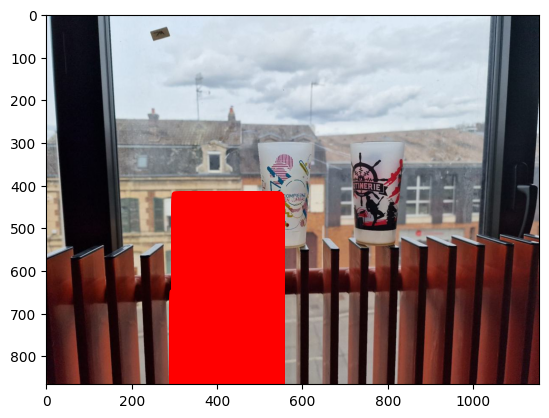

In [33]:
# show positive patches
plt.imshow(img)
for patch in positive_patches:
    plt.gca().add_patch(plt.Rectangle((patch[0],patch[1]),patch[2],patch[3],fill=False,color='r'))